In [ ]:
# Install required packages
!pip install kaggle matplotlib mpld3 scikit-image
!pip install layers

# Importing necessary libraries
from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import os
from skimage.metrics import mean_squared_error, structural_similarity as ssim, peak_signal_noise_ratio as psnr

# Enable interactive plots in the notebook
mpld3.enable_notebook()

# Assuming these custom modules are available in the working directory
# Importing custom modules
import layers as nn # Importing a module named "layers" as "nn"
import expander as expander # Importing a module named "expander" as "expander"
import exact_solve as exact_solve # Importing a module named "exact_solve" as "exact_solve"

In [ ]:
# Function to visualize images
def visualize_images(*imgs):
    # Create a figure and axis based on the number of input images
    fig, ax = plt.subplots(1, len(imgs))
    for idx, img in enumerate(imgs):
        img = np.clip(img, 0, 1)  # Clip the pixel values between 0 and 1
        if img.shape[0] == 1:  # Check if the image is grayscale
            img = img[0]  # Remove the channel dimension for grayscale images
            ax[idx].imshow(1-img, cmap='Greys')  # Display grayscale image
        else:
            img = np.rollaxis(img, 0, 3)  # Reorder dimensions for RGB images
            ax[idx].imshow(img)  # Display RGB image
    plt.show()  # Show the plotted images

# Function to corrupt images
def corrupt_image(image, corruption_level=0.5):
    corrupted = image.copy()  # Create a copy of the original image
    num_corrupted = int(corruption_level * corrupted.size)  # Calculate the number of pixels to corrupt
    indices = np.random.choice(corrupted.size, num_corrupted, replace=False)  # Randomly choose pixel indices to corrupt
    corrupted.flat[indices] = 0  # Set the selected pixels to 0 (corruption)
    return corrupted  # Return the corrupted image

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and expand dimensions to match expected input shape
x_test = x_test / 255.0  # Normalize pixel values to the range [0, 1]

# Resize the test images to 16x16
x_test_resized = np.array([tf.image.resize(image[..., np.newaxis], (16, 16)) for image in x_test])  # Resize each image to 16x16
x_test_resized = np.squeeze(x_test_resized)  # Remove the singleton dimension

# Expand dimensions to match expected input shape for single channel
x_test_resized = np.expand_dims(x_test_resized, axis=1)  # Add a singleton dimension for the channel

# Create a directory to save inpainted images
output_dir = 'inpainted_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the network architecture
net = nn.Sequential(
    nn.Conv(kernel_size=3),
    nn.LeakyReLU(),
    nn.Downsample(),
    nn.Conv(kernel_size=3),
    nn.LeakyReLU(),
    nn.Downsample(),
    nn.Conv(kernel_size=3),
    nn.LeakyReLU(),
    nn.Downsample(),
    nn.Conv(kernel_size=3),
    nn.LeakyReLU(),
    nn.Upsample(bilinear=False),
    nn.Conv(kernel_size=3),
    nn.LeakyReLU(),
    nn.Upsample(bilinear=False),
    nn.Conv(kernel_size=3),
    nn.LeakyReLU(),
    nn.Upsample(bilinear=False),
    nn.Conv(kernel_size=3)
)

# Provide an image size, number of CPU threads for computing the kernel
image_size = 16
# Compute the Neural Tangent Kernel (NTK) for the defined network and image size
K = net.get_ntk(image_size, num_threads=10)  # This computes the NTK for the network with specified parameters

TypeError: Conv() takes no arguments

Expanding kernel for image 0...
Performing inpainting...
Loaded Kernel; Now Subsetting Observed Entries
Starting exact solve for kernel regression
This system has 44 equations & unknowns.
0.0005583763122558594  time for solve
Image 0:
MSE: 0.07041240838505392, SSIM: 0.4504647830026806, PSNR: 16.082171176355175


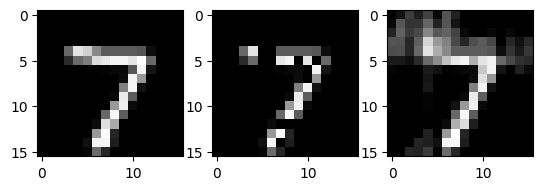

Expanding kernel for image 1...
Performing inpainting...
Loaded Kernel; Now Subsetting Observed Entries
Starting exact solve for kernel regression
This system has 54 equations & unknowns.
0.0004858970642089844  time for solve
Image 1:
MSE: 0.10060299311369292, SSIM: 0.5250957686826587, PSNR: 13.5635479613581


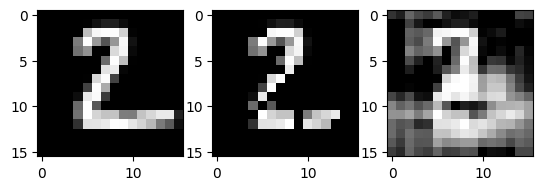

Expanding kernel for image 2...
Performing inpainting...
Loaded Kernel; Now Subsetting Observed Entries
Starting exact solve for kernel regression
This system has 27 equations & unknowns.
0.00033211708068847656  time for solve
Image 2:
MSE: 0.033369530921809165, SSIM: 0.344294458621298, PSNR: 18.105958505411156


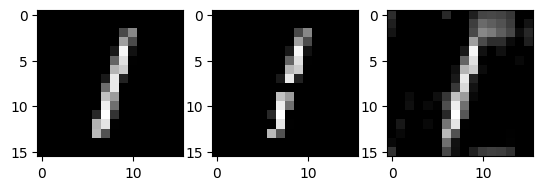

Expanding kernel for image 3...
Performing inpainting...
Loaded Kernel; Now Subsetting Observed Entries
Starting exact solve for kernel regression
This system has 64 equations & unknowns.
0.0005726814270019531  time for solve
Image 3:
MSE: 0.14309037844168793, SSIM: 0.7471398224681616, PSNR: 15.410808324032207


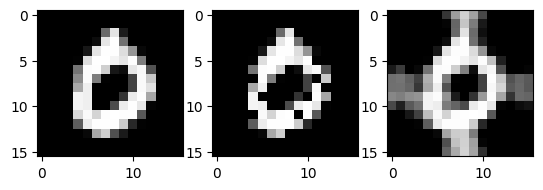

Expanding kernel for image 4...
Performing inpainting...
Loaded Kernel; Now Subsetting Observed Entries
Starting exact solve for kernel regression
This system has 47 equations & unknowns.
0.0004451274871826172  time for solve
Image 4:
MSE: 0.057787507780322045, SSIM: 0.6840433217212558, PSNR: 17.451964299940897


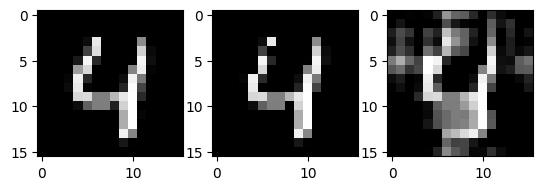

Streaming output truncated to the last 5000 lines.
Performing inpainting...
Loaded Kernel; Now Subsetting Observed Entries
Starting exact solve for kernel regression
This system has 73 equations & unknowns.
0.0004839897155761719  time for solve
Expanding kernel for image 9168...
Performing inpainting...
Loaded Kernel; Now Subsetting Observed Entries
Starting exact solve for kernel regression
This system has 56 equations & unknowns.
0.00044345855712890625  time for solve
Expanding kernel for image 9169...
Performing inpainting...
Loaded Kernel; Now Subsetting Observed Entries
Starting exact solve for kernel regression
This system has 60 equations & unknowns.
0.000457763671875  time for solve
Expanding kernel for image 9170...
Performing inpainting...
Loaded Kernel; Now Subsetting Observed Entries
Starting exact solve for kernel regression
This system has 58 equations & unknowns.
0.0016369819641113281  time for solve
Expanding kernel for image 9171...
Performing inpainting...
Loaded Kern

In [ ]:
mse_values = []
ssim_values = []
psnr_values = []

for idx, image in enumerate(x_test_resized):
    corrupted = corrupt_image(image, corruption_level=0.2)
    mask = (corrupted != 0).astype(np.float32)

    s = 3
    _, w, h = corrupted.shape

    print(f"Expanding kernel for image {idx}...")
    try:
        K_expanded = expander.expand_kernel(K, s, w, h)
    except Exception as e:
        print(f"Error expanding kernel: {e}")
        continue

    print("Performing inpainting...")
    try:
        imputed_img_exact = exact_solve.kr_solve(K_expanded, corrupted, mask)
    except Exception as e:
        print(f"Error during inpainting: {e}")
        continue

    inpainted_img_path = os.path.join(output_dir, f'inpainted_{idx}.jpg')
    plt.imsave(inpainted_img_path, imputed_img_exact[0], cmap='Greys')

    mse = mean_squared_error(image[0], imputed_img_exact[0])
    ssim_value = ssim(image[0], imputed_img_exact[0], data_range=imputed_img_exact[0].max() - imputed_img_exact[0].min())
    psnr_value = psnr(image[0], imputed_img_exact[0], data_range=imputed_img_exact[0].max() - imputed_img_exact[0].min())

    mse_values.append(mse)
    ssim_values.append(ssim_value)
    psnr_values.append(psnr_value)

    if idx < 5:
        print(f"Image {idx}:")
        print(f"MSE: {mse}, SSIM: {ssim_value}, PSNR: {psnr_value}")
        # Plotting the output with higher DPI
        plt.figure(dpi=300)
        visualize_images(image, corrupted, imputed_img_exact)

average_mse = np.mean(mse_values)
average_ssim = np.mean(ssim_values)
average_psnr = np.mean(psnr_values)

print(f"Average MSE: {average_mse}")
print(f"Average SSIM: {average_ssim}")
print(f"Average PSNR: {average_psnr}")